Collab link: https://colab.research.google.com/drive/19zey3VCkF9K2r9EYfN4elUophs52X4ta#scrollTo=LrwqxWPKhSB2

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


random.seed(1)
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv(f'/content/drive/MyDrive/Applied Data Mining/completedata.csv')

In [4]:
data.columns

Index(['Age', 'AnyHealthcare', 'AtLeastOneDrinkPerWeekOrMonth',
       'AvgDrinkPerDayInLastMonth', 'BMI', 'CholCheck', 'CoronaryHeartDisease',
       'Diabetes', 'DrinkOccasionsPerDay', 'DrinksPerWeek', 'Education',
       'GenHlth', 'HeartAttack', 'HeartDiseaseorAttack', 'HighBP', 'HighChol',
       'HvyAlcoholConsump', 'Income', 'MentHlth', 'NoDocbcCost',
       'PhysActivity', 'PhysHlth', 'Sex', 'Smoker', 'State', 'Stroke'],
      dtype='object')

#TRANING MODEL¶


In [5]:
y=data[['Diabetes']]


x=data.drop('Diabetes',axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


model=StandardScaler()

new_data=model.fit_transform(x_test)

x_test=pd.DataFrame(new_data)
                    
                    
new_data=model.fit_transform(x_train)

x_train=pd.DataFrame(new_data)                    
                    

(476586, 26)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


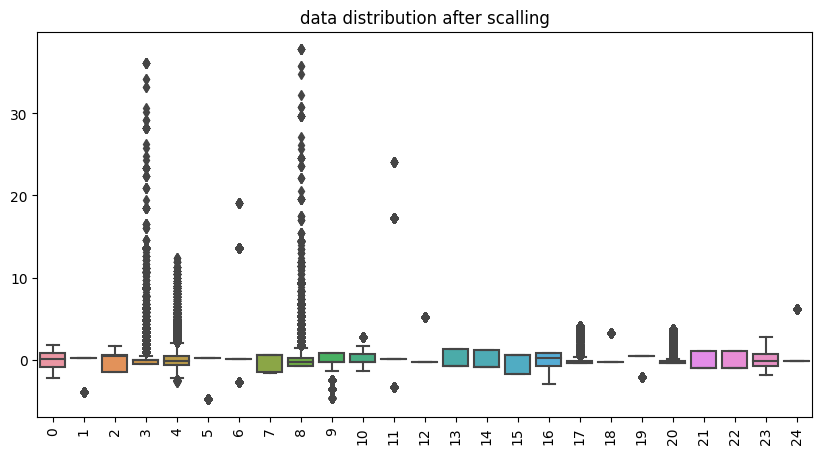

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train)
print(data.shape)
l=list(np.arange(25))
print(l)
plt.title("data distribution after scalling")
plt.xticks(l, list(x_train.columns),
       rotation=90)
plt.show()

#LOGISTIC *REGRESSION¶*


In [7]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


model=LogisticRegression()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred=model.predict(x_test)

0.9027256132105164


In [8]:
confusion_matrix(y_test,pred)

array([[85446,     0,   625],
       [ 1318,     0,    49],
       [ 7280,     0,   600]])

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     86071
         1.0       0.00      0.00      0.00      1367
         2.0       0.47      0.08      0.13      7880

    accuracy                           0.90     95318
   macro avg       0.46      0.36      0.36     95318
weighted avg       0.86      0.90      0.87     95318



Text(0.5, 1.0, 'roc curve')

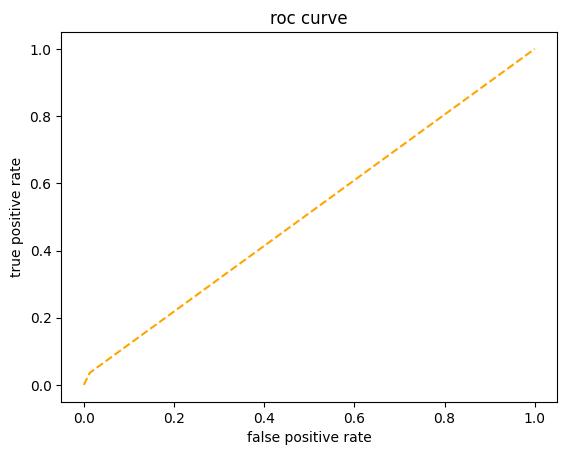

In [10]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")

#DECISION TREE¶


In [11]:

from sklearn.tree import DecisionTreeClassifier


model=DecisionTreeClassifier()


model.fit(x_train,y_train)

print(model.score(x_test,y_test))

pred1=model.predict(x_test)

0.8299691558782182


In [12]:
confusion_matrix(y_test,pred1)

array([[77114,  1578,  7379],
       [ 1064,    47,   256],
       [ 5617,   313,  1950]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     86071
         1.0       0.02      0.03      0.03      1367
         2.0       0.20      0.25      0.22      7880

    accuracy                           0.83     95318
   macro avg       0.38      0.39      0.39     95318
weighted avg       0.85      0.83      0.84     95318



Text(0.5, 1.0, 'roc curve')

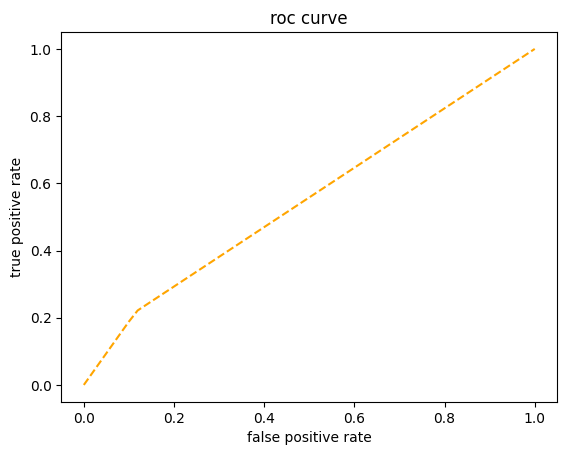

In [14]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred1, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")

#RANDOM *FOREST¶*


In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred2=model.predict(x_test)

0.9032501731047651


Text(0.5, 1.0, 'roc curve')

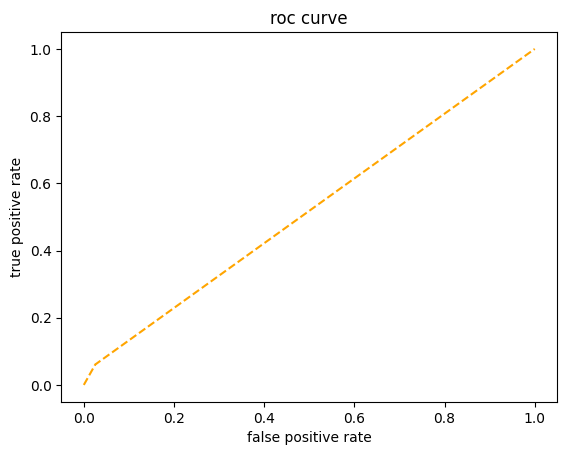

In [17]:
pred2=model.predict(x_test)


from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred2, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")



#KNeighborsClassifier



In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8944795316729264

Text(0.5, 1.0, 'roc curve')

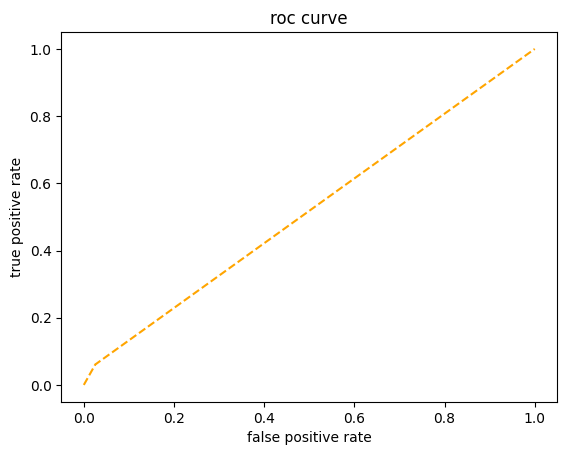

In [18]:
pred2=model.predict(x_test)


from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred2, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")